In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
from torchsummary import summary
from models import Net #Importing `Net` from model.py
from tqdm import tqdm
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:

train_transforms=transforms.Compose([
                                      transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))
])
test_transforms=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:
train=datasets.MNIST('./data',train=True,download=True,transform=train_transforms)
test=datasets.MNIST('./data',train=False,download=True,transform=test_transforms)

In [4]:
SEED=1
cuda=torch.cuda.is_available()
print('cuda',cuda)
torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

dataloader_args=dict(shuffle=True,batch_size=128,num_workers=4,pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader=torch.utils.data.DataLoader(train,**dataloader_args)
test_loader=torch.utils.data.DataLoader(test,**dataloader_args)

cuda False


torch.Size([64, 1, 28, 28])
torch.Size([64])


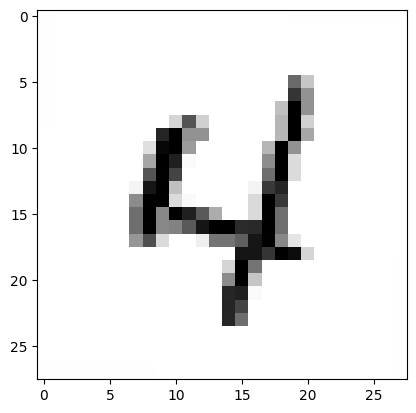

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

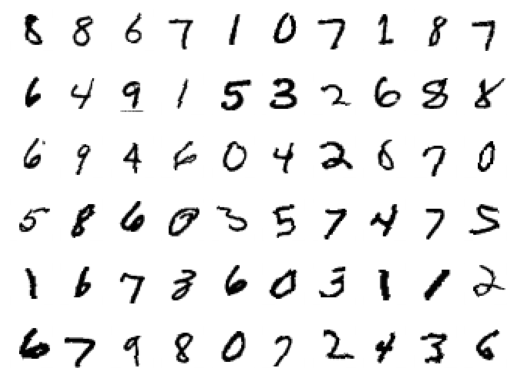

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
f='BN'
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(f,num=1).to(device)
summary(model, input_size=(1, 28, 28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           1,800
              ReLU-6           [-1, 20, 24, 24]               0
       BatchNorm2d-7           [-1, 20, 24, 24]              40
           Dropout-8           [-1, 20, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]           1,800
             ReLU-10           [-1, 10, 22, 22]               0
      BatchNorm2d-11           [-1, 10, 22, 22]              20
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14           [-1,

In [8]:
f='GN'
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(f,num=1).to(device)
summary(model, input_size=(1, 28, 28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
         GroupNorm-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           1,800
              ReLU-6           [-1, 20, 24, 24]               0
         GroupNorm-7           [-1, 20, 24, 24]              40
           Dropout-8           [-1, 20, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]           1,800
             ReLU-10           [-1, 10, 22, 22]               0
        GroupNorm-11           [-1, 10, 22, 22]              20
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14           [-1,

In [9]:
f='LN'
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(f,num=1).to(device)
summary(model, input_size=(1, 28, 28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
         LayerNorm-3           [-1, 10, 26, 26]          13,520
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           1,800
              ReLU-6           [-1, 20, 24, 24]               0
         LayerNorm-7           [-1, 20, 24, 24]          23,040
           Dropout-8           [-1, 20, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]           1,800
             ReLU-10           [-1, 10, 22, 22]               0
        LayerNorm-11           [-1, 10, 22, 22]           9,680
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14           [-1,

In [10]:
# from tqdm import tqdm

# train_losses = []
# test_losses = []
# train_acc = []
# test_acc = []

# def train(model, device, train_loader, optimizer, epoch):
#   model.train()
#   pbar = tqdm(train_loader)
#   correct = 0
#   processed = 0
#   for batch_idx, (data, target) in enumerate(pbar):
#     # get samples
#     data, target = data.to(device), target.to(device)

#     # Init
#     optimizer.zero_grad()
#     # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
#     # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

#     # Predict
#     y_pred = model(data)

#     # Calculate loss
#     loss = F.nll_loss(y_pred, target)
#     train_losses.append(loss)

#     # Backpropagation
#     loss.backward()
#     optimizer.step()

#     # Update pbar-tqdm

#     pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#     correct += pred.eq(target.view_as(pred)).sum().item()
#     processed += len(data)

#     pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
#     train_acc.append(100*correct/processed)

# def test(model, device, test_loader):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
#             pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     test_loss /= len(test_loader.dataset)
#     test_losses.append(test_loss)

#     print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))

#     test_acc.append(100. * correct / len(test_loader.dataset))

In [11]:
from tqdm import tqdm

train_losses = {"BN":[],"GN":[],"LN":[]}
test_losses = {"BN":[],"GN":[],"LN":[]}
train_acc = {"BN":[],"GN":[],"LN":[]}
test_acc = {"BN":[],"GN":[],"LN":[]}

def train(model, device, train_loader, optimizer, epoch, runName, L1flag=False):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)


    # L1 Regularization
    if L1flag:
        l1_lambda = 1.0e-5
        l1_loss = torch.tensor(0., requires_grad=True)
        l1_loss=l1_loss.to(device)
        for name, param in model.named_parameters():
            l1_loss = l1_loss + l1_lambda*(torch.norm(param, 1))
        loss=loss+l1_loss

    train_losses[runName].append(loss.item())
    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc[runName].append(100*correct/processed)

def test(model, device, test_loader, runName):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses[runName].append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc[runName].append(100. * correct / len(test_loader.dataset))

In [12]:
# f='GN'
# model =  Net(f,num=2).to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
# EPOCHS = 15
# for epoch in range(EPOCHS):
#     print("EPOCH:", epoch)
#     train(model, device, train_loader, optimizer, epoch)
#     scheduler.step()
#     test(model, device, test_loader)

In [13]:
f='GN'
model =  Net(f,num=2).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 3

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, runName='GN')
    scheduler.step()
    test(model, device, test_loader, runName='GN')


EPOCH: 0


Loss=0.49918535351753235 Batch_id=937 Accuracy=85.21: 100%|██████████| 938/938 [01:27<00:00, 10.74it/s] 



Test set: Average loss: 0.1329, Accuracy: 9599/10000 (95.99%)

EPOCH: 1


Loss=0.0782129094004631 Batch_id=937 Accuracy=96.13: 100%|██████████| 938/938 [01:27<00:00, 10.78it/s]  



Test set: Average loss: 0.0733, Accuracy: 9768/10000 (97.68%)

EPOCH: 2


Loss=0.2277381867170334 Batch_id=937 Accuracy=96.96: 100%|██████████| 938/938 [01:30<00:00, 10.34it/s]  



Test set: Average loss: 0.0515, Accuracy: 9842/10000 (98.42%)



In [14]:
f='LN'
model =  Net(f,num=2).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 3

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, runName='LN')
    scheduler.step()
    test(model, device, test_loader, runName='LN')


EPOCH: 0


Loss=0.2604784071445465 Batch_id=937 Accuracy=83.83: 100%|██████████| 938/938 [01:24<00:00, 11.07it/s]  



Test set: Average loss: 0.1218, Accuracy: 9694/10000 (96.94%)

EPOCH: 1


Loss=0.019317394122481346 Batch_id=937 Accuracy=96.39: 100%|██████████| 938/938 [01:16<00:00, 12.27it/s]



Test set: Average loss: 0.0669, Accuracy: 9803/10000 (98.03%)

EPOCH: 2


Loss=0.019241711124777794 Batch_id=937 Accuracy=97.27: 100%|██████████| 938/938 [01:14<00:00, 12.53it/s]



Test set: Average loss: 0.0559, Accuracy: 9821/10000 (98.21%)



In [15]:
f='BN'
model =  Net(f,num=2).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 3

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, runName='BN',L1flag=True)
    scheduler.step()
    test(model, device, test_loader, runName='BN')

EPOCH: 0


Loss=0.42244192957878113 Batch_id=937 Accuracy=88.96: 100%|██████████| 938/938 [01:34<00:00,  9.95it/s] 



Test set: Average loss: 0.0746, Accuracy: 9778/10000 (97.78%)

EPOCH: 1


Loss=0.12336328625679016 Batch_id=937 Accuracy=96.64: 100%|██████████| 938/938 [01:31<00:00, 10.27it/s] 



Test set: Average loss: 0.0642, Accuracy: 9805/10000 (98.05%)

EPOCH: 2


Loss=0.08692055940628052 Batch_id=937 Accuracy=97.32: 100%|██████████| 938/938 [01:27<00:00, 10.68it/s] 



Test set: Average loss: 0.0523, Accuracy: 9829/10000 (98.29%)

